In [145]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [146]:
train_dataset = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
train_dataset_ans = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)

train_loader = DataLoader(dataset=train_dataset, batch_size=4, shuffle=False)

In [147]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(in_features=2, out_features=1)

    def forward(self, input_data):
        out = self.fc1(input_data)
        out = F.sigmoid(out)
        return out


In [148]:
model = ANN()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.BCELoss()

Epoch [1000/30000], Loss: 0.3930
Epoch [2000/30000], Loss: 0.2921
Epoch [3000/30000], Loss: 0.2134
Epoch [4000/30000], Loss: 0.1556
Epoch [5000/30000], Loss: 0.1135
Epoch [6000/30000], Loss: 0.0828
Epoch [7000/30000], Loss: 0.0604
Epoch [8000/30000], Loss: 0.0441
Epoch [9000/30000], Loss: 0.0322
Epoch [10000/30000], Loss: 0.0235
Epoch [11000/30000], Loss: 0.0172
Epoch [12000/30000], Loss: 0.0126
Epoch [13000/30000], Loss: 0.0092
Epoch [14000/30000], Loss: 0.0067
Epoch [15000/30000], Loss: 0.0049
Epoch [16000/30000], Loss: 0.0036
Epoch [17000/30000], Loss: 0.0027
Epoch [18000/30000], Loss: 0.0019
Epoch [19000/30000], Loss: 0.0014
Epoch [20000/30000], Loss: 0.0010
Epoch [21000/30000], Loss: 0.0008
Epoch [22000/30000], Loss: 0.0006
Epoch [23000/30000], Loss: 0.0004
Epoch [24000/30000], Loss: 0.0003
Epoch [25000/30000], Loss: 0.0002
Epoch [26000/30000], Loss: 0.0002
Epoch [27000/30000], Loss: 0.0001
Epoch [28000/30000], Loss: 0.0001
Epoch [29000/30000], Loss: 0.0001
Epoch [30000/30000], Lo

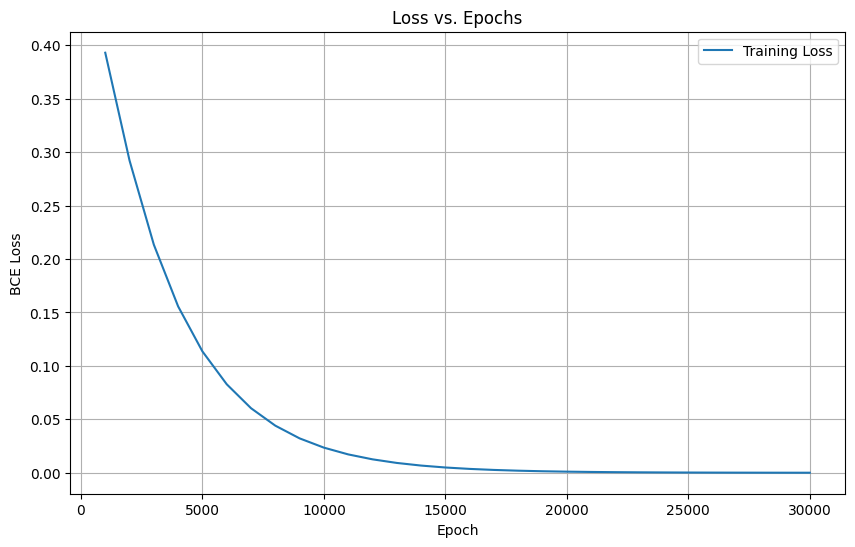

In [149]:
epochs = 30000
epoch_history = []
loss_history = []
for epoch in range(epochs):
    # --- PyTorch Training Loop ---
    # 1. Forward pass: compute predicted y by passing x to the model
    output = model(train_dataset)

    # 2. Compute loss
    loss = loss_function(output, train_dataset_ans)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
        epoch_history.append(epoch + 1)
        loss_history.append(loss.item())


plt.figure(figsize=(10, 6))
plt.plot(epoch_history, loss_history, label='Training Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.legend()
plt.grid(True)
plt.show()